In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import tensorflow as tf
from tensorflow import keras
# %config InlineBackend.figure_format= 'retina'
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

3


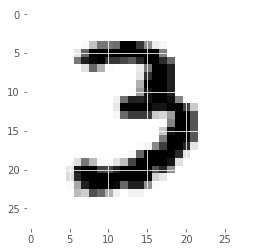

In [3]:
plt.imshow(train.iloc[9, 1:].values.reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest');
print(train.iloc[9, 0])

In [4]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(train.iloc[:,1:], train.iloc[:,0])

In [5]:
x_train = train.iloc[:, 1:]
y_train = train.iloc[:, 0]

In [6]:
# 将DataFrame变成array格式
# Xtrain = Xtrain.values.reshape(Xtrain.values.shape[0],28,28)
# Xtest = Xtest.values.reshape(Xtest.values.shape[0],28,28)
# ytrain, ytest = ytrain.values, ytest.values
x_train = x_train.values.reshape(x_train.shape[0], 28, 28)
y_train = y_train.values
test = test.values.reshape(test.shape[0], 28, 28)

In [7]:
# normalization
# Xtrain, Xtest = Xtrain / 255, Xtest / 255
x_train = x_train / 255
test = test / 255

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [9]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
42000/42000 [==============================] - 13s 312us/step - loss: 0.2444 - acc: 0.9283
Epoch 2/5
42000/42000 [==============================] - 13s 306us/step - loss: 0.1072 - acc: 0.9683
Epoch 3/5
42000/42000 [==============================] - 15s 354us/step - loss: 0.0777 - acc: 0.9757
Epoch 4/5
42000/42000 [==============================] - 12s 296us/step - loss: 0.0568 - acc: 0.9817
Epoch 5/5
42000/42000 [==============================] - 13s 310us/step - loss: 0.0458 - acc: 0.9850


In [11]:
# model.evaluate(Xtest, ytest)

In [12]:
y_pred = model.predict(test)

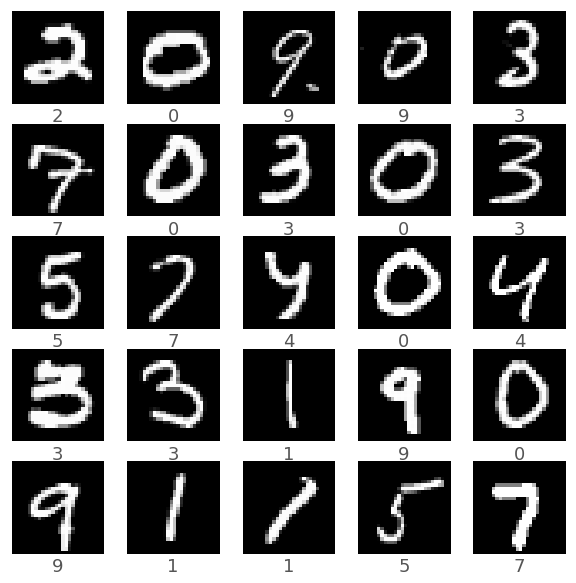

In [37]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(test[i], cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(np.argmax(y_pred[i]), size=18);

In [39]:
y = []
for i in y_pred:
    y.append(np.argmax(i))

In [155]:
# 决策树
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(Xtrain, ytrain)
ypred = dtc.predict(Xtest)

In [29]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
# rf.fit(Xtrain, ytrain)
rf.fit(train.iloc[:,1:], train.iloc[:,0])
# ypred = dtc.predict(Xtest)
ypred = rf.predict(test)

In [41]:
df = pd.DataFrame({'Label': y})
df.index = list(range(1, df.shape[0]+1))
df.index.name = 'ImageId'

In [42]:
df.to_csv('submission.csv')

In [18]:
sum(ytest.values == ypred)/ypred.shape[0]

1.0

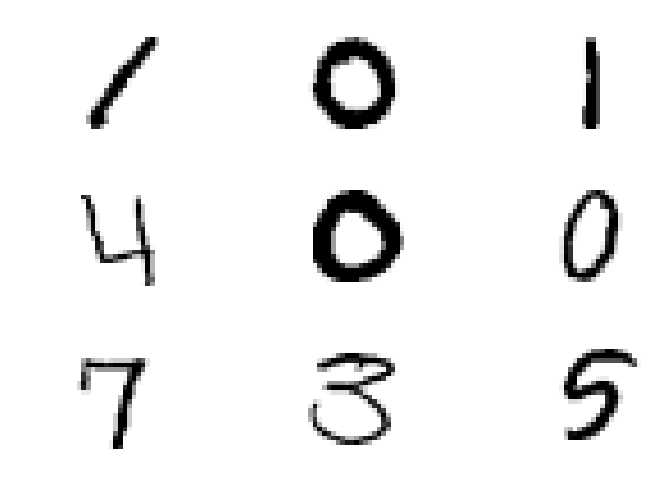

In [39]:
for i in range(9):
    image_data = train.iloc[i, 1:].values.reshape(28,28)
    sub = int('33{}'.format(i+1))
    plt.subplot(sub)
    plt.imshow(image_data, plt.cm.gray_r, interpolation='nearest')
    plt.axis('off')
plt.show();

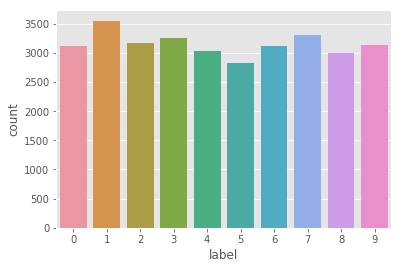

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(ytrain);

In [5]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

ypred = nb.fit(Xtrain, ytrain).predict(Xtest)

In [17]:
ypred[:20]

array([7, 3, 6, 3, 1, 0, 5, 2, 3, 5, 7, 1, 8, 8, 8, 2, 9, 9, 5, 7])

In [18]:
ytest.values[:20]

array([7, 3, 6, 3, 1, 0, 5, 2, 3, 5, 7, 1, 8, 8, 8, 2, 9, 9, 5, 7])

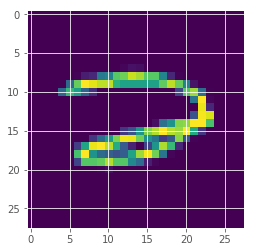

In [11]:
plt.imshow(Xtest.iloc[15,:].values.reshape(28,28))

In [88]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [89]:
precision_score(ytest, ypred, average='micro')

NameError: name 'ypred' is not defined

In [27]:
recall_score(ytest, ypred, average='micro')

0.9404761904761905

In [28]:
f1_score(ytest, ypred, average='macro')

0.939637722983224